#Imports

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IBMR/ML/Supervised/Classification/DecisionTree/salaries.csv')

In [3]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


#Perform certain checks of data pre-processing

Check if missing values present in any feature of the Dataset df

In [22]:
df.isna().any()

company                  False
job                      False
degree                   False
salary_more_then_100k    False
dtype: bool

Count of missing values in each feature of the dataset

In [23]:
df.isna().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

# Divide the dataset into Independent Features and Labels

In [4]:
X = df.drop('salary_more_then_100k', axis = 1)

In [5]:
y = df['salary_more_then_100k']

# Perform exploratory data analysis on the dataset

In [7]:
X.columns

Index(['company', 'job', 'degree'], dtype='object')

In [9]:
for column in X.columns:
  print(X[column].unique())

['google' 'abc pharma' 'facebook']
['sales executive' 'business manager' 'computer programmer']
['bachelors' 'masters']


All the 3 features in our dataset contains categorical values. These need to be converted to neumerical datatype before training the model  

In [11]:
company_dummies = pd.get_dummies(data=X['company'])
company_dummies

,abc pharma,facebook,google
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [12]:
job_dummies = pd.get_dummies(data=X['job'])
job_dummies

,business manager,computer programmer,sales executive
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0
5,0,1,0
6,0,0,1
7,0,1,0
8,1,0,0
9,1,0,0


In [13]:
degree_dummies = pd.get_dummies(data=X['degree'])
degree_dummies

,bachelors,masters
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1
6,0,1
7,1,0
8,1,0
9,0,1


Concatinating all the above dataframe to dataframe X

In [15]:
X = pd.concat([X,company_dummies,job_dummies,degree_dummies],axis=1)

In [16]:
X.columns

Index(['company', 'job', 'degree', 'abc pharma', 'facebook', 'google',
       'business manager', 'computer programmer', 'sales executive',
       'bachelors', 'masters'],
      dtype='object')

Dropping the categorical columns

In [17]:
X.drop(['company', 'job', 'degree'], axis=1, inplace = True)

In [18]:
X.columns

Index(['abc pharma', 'facebook', 'google', 'business manager',
       'computer programmer', 'sales executive', 'bachelors', 'masters'],
      dtype='object')

Final dataframe is ready

#Splitting the dataset in Training and Test set

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [26]:
len(X_train)

12

In [28]:
len(X_test)

4

#Create a model from Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier()

#Train the model

In [31]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

#Test the model

In [32]:
model.predict(X_test)

array([0, 1, 1, 1])

# Accuracy of the model

In [33]:
model.score(X_test, y_test)

1.0

#Explore model performance using confusion matrix

In [41]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 0],
       [0, 3]])

Visualise using seaborn library

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(95.72222222222221, 0.5, 'Truth')

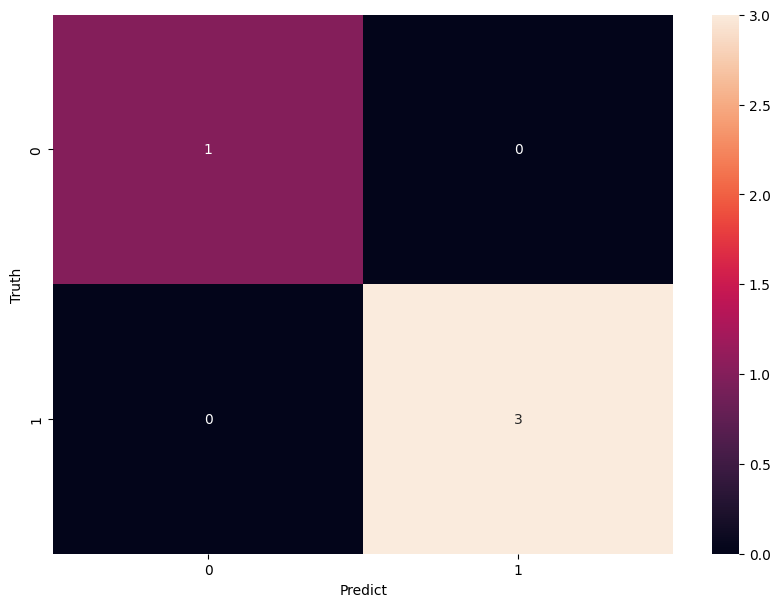

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')
